### Outlier Factors for Device Profiling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../../../diploma/multi-source-syber-security-events/flows.txt', header=None, nrows=2000000)

df.columns = ['time', 'duration', 'source computer', 'source port', 'destination computer', 
              'destination port', 'protocol', 'packet count', 'byte count']

#df = pd.read_csv('../../../diploma/generated_data/500_400000(non_uniform)_1-200_True_C4_7.txt', header=None)

#df.columns = ['time', 'source computer', 'byte count']

df.index = df['time']
df.drop(columns=['time'],inplace=True)
df.head()

,duration,source computer,source port,destination computer,destination port,protocol,packet count,byte count
time,,,,,,,,
1,0,C1065,389,C3799,N10451,6,10,5323
1,0,C1423,N1136,C1707,N1,6,5,847
1,0,C1423,N1142,C1707,N1,6,5,847
1,0,C14909,N8191,C5720,2049,6,1,52
1,0,C14909,N8192,C5720,2049,6,1,52


In [2]:
# or try a simple generated dataset
len(df)

2000000

In [3]:
from sklearn.preprocessing import MinMaxScaler

def scale(x):
    return np.log(x + 1)
   

class customScaler():
    def __init__(self, feature_range=(1,100)):
        self.feature_range = feature_range
    
    def fit(self, x):
        scaled_data = scale(x)
        self.scaler = MinMaxScaler(feature_range=self.feature_range)
        self.scaler.fit(scaled_data)

    def transform(self, data):
        scaled_data = scale(data)
        transformed = self.scaler.transform(scaled_data).astype(int)
        return np.array(transformed, dtype=np.int64)

In [4]:
from helper import group_data

scaler = customScaler()

groupped_data, hosts = group_data(df, size_of_bin_seconds=50, doScale=True, scaler=scaler)

In [5]:
from emClustering import OnlineEM
from plots import plot_points, plot_results, plot_category, plot_all_categories

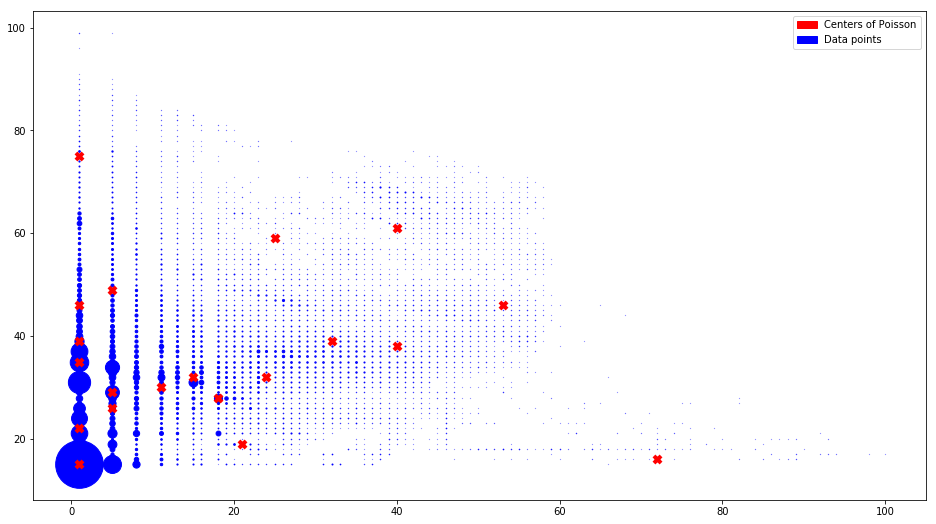

In [6]:
from helper import get_random_initialize_lamdas
from kplusplus import KPlusPlus

mixtures = 20

kplusplus = KPlusPlus(mixtures, groupped_data.values[:,:-1])

kplusplus.init_centers()

# random initialization
onlineEM = OnlineEM([1/mixtures]*mixtures, kplusplus.centers, 500, n_clusters=20, verbose=1)
plot_points(groupped_data.values[:,:-1], onlineEM)

In [7]:
onlineEM.fit(groupped_data.values)

Running for data till position 500 from total 388996
Running for data till position 1000 from total 388996
Running for data till position 1500 from total 388996
Running for data till position 2000 from total 388996
Running for data till position 2500 from total 388996
Running for data till position 3000 from total 388996
Running for data till position 3500 from total 388996
Running for data till position 4000 from total 388996
Running for data till position 4500 from total 388996
Running for data till position 5000 from total 388996
Running for data till position 5500 from total 388996
Running for data till position 6000 from total 388996
Running for data till position 6500 from total 388996
Running for data till position 7000 from total 388996
Running for data till position 7500 from total 388996
Running for data till position 8000 from total 388996
Running for data till position 8500 from total 388996
Running for data till position 9000 from total 388996
Running for data till positio

Running for data till position 75500 from total 388996
Running for data till position 76000 from total 388996
Running for data till position 76500 from total 388996
Running for data till position 77000 from total 388996
Running for data till position 77500 from total 388996
Running for data till position 78000 from total 388996
Running for data till position 78500 from total 388996
Running for data till position 79000 from total 388996
Running for data till position 79500 from total 388996
Running for data till position 80000 from total 388996
Running for data till position 80500 from total 388996
Running for data till position 81000 from total 388996
Running for data till position 81500 from total 388996
Running for data till position 82000 from total 388996
Running for data till position 82500 from total 388996
Running for data till position 83000 from total 388996
Running for data till position 83500 from total 388996
Running for data till position 84000 from total 388996
Running fo

Running for data till position 149500 from total 388996
Running for data till position 150000 from total 388996
Running for data till position 150500 from total 388996
Running for data till position 151000 from total 388996
Running for data till position 151500 from total 388996
Running for data till position 152000 from total 388996
Running for data till position 152500 from total 388996
Running for data till position 153000 from total 388996
Running for data till position 153500 from total 388996
Running for data till position 154000 from total 388996
Running for data till position 154500 from total 388996
Running for data till position 155000 from total 388996
Running for data till position 155500 from total 388996
Running for data till position 156000 from total 388996
Running for data till position 156500 from total 388996
Running for data till position 157000 from total 388996
Running for data till position 157500 from total 388996
Running for data till position 158000 from total

Running for data till position 223000 from total 388996
Running for data till position 223500 from total 388996
Running for data till position 224000 from total 388996
Running for data till position 224500 from total 388996
Running for data till position 225000 from total 388996
Running for data till position 225500 from total 388996
Running for data till position 226000 from total 388996
Running for data till position 226500 from total 388996
Running for data till position 227000 from total 388996
Running for data till position 227500 from total 388996
Running for data till position 228000 from total 388996
Running for data till position 228500 from total 388996
Running for data till position 229000 from total 388996
Running for data till position 229500 from total 388996
Running for data till position 230000 from total 388996
Running for data till position 230500 from total 388996
Running for data till position 231000 from total 388996
Running for data till position 231500 from total

Running for data till position 296500 from total 388996
Running for data till position 297000 from total 388996
Running for data till position 297500 from total 388996
Running for data till position 298000 from total 388996
Running for data till position 298500 from total 388996
Running for data till position 299000 from total 388996
Running for data till position 299500 from total 388996
Running for data till position 300000 from total 388996
Running for data till position 300500 from total 388996
Running for data till position 301000 from total 388996
Running for data till position 301500 from total 388996
Running for data till position 302000 from total 388996
Running for data till position 302500 from total 388996
Running for data till position 303000 from total 388996
Running for data till position 303500 from total 388996
Running for data till position 304000 from total 388996
Running for data till position 304500 from total 388996
Running for data till position 305000 from total

Running for data till position 370000 from total 388996
Running for data till position 370500 from total 388996
Running for data till position 371000 from total 388996
Running for data till position 371500 from total 388996
Running for data till position 372000 from total 388996
Running for data till position 372500 from total 388996
Running for data till position 373000 from total 388996
Running for data till position 373500 from total 388996
Running for data till position 374000 from total 388996
Running for data till position 374500 from total 388996
Running for data till position 375000 from total 388996
Running for data till position 375500 from total 388996
Running for data till position 376000 from total 388996
Running for data till position 376500 from total 388996
Running for data till position 377000 from total 388996
Running for data till position 377500 from total 388996
Running for data till position 378000 from total 388996
Running for data till position 378500 from total

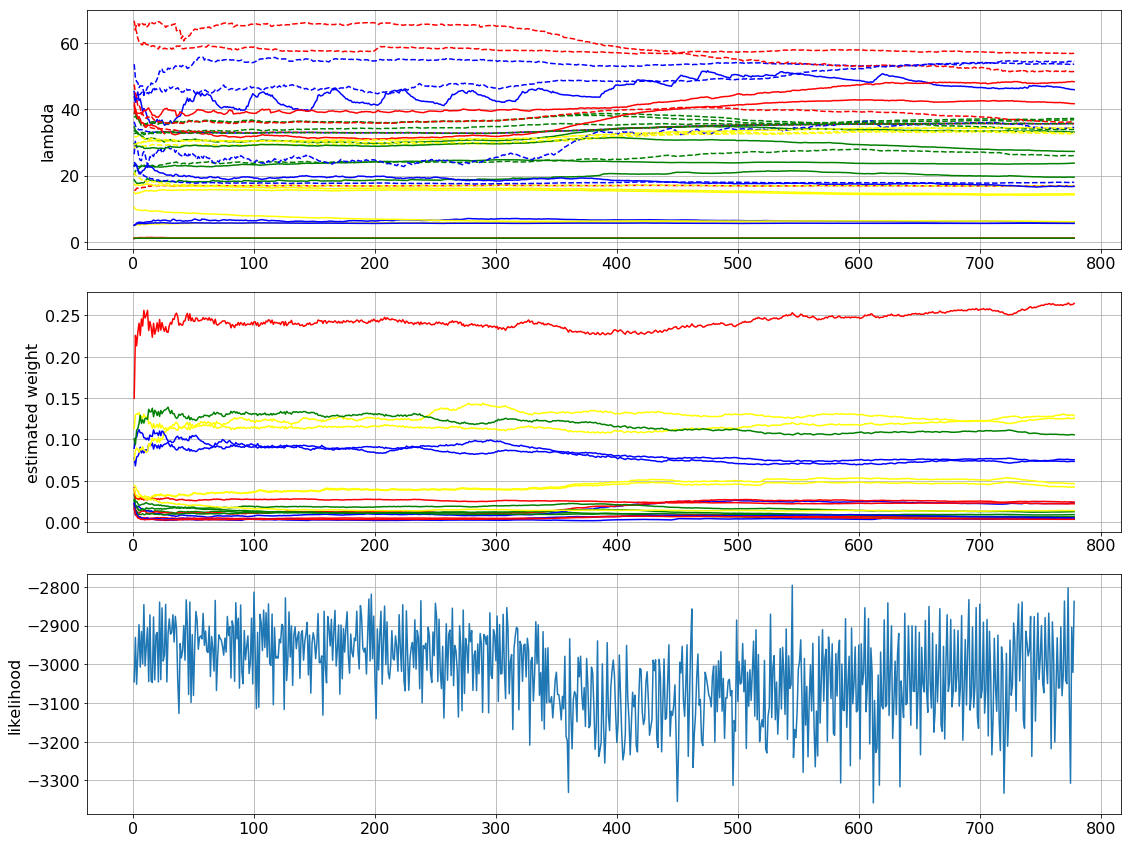

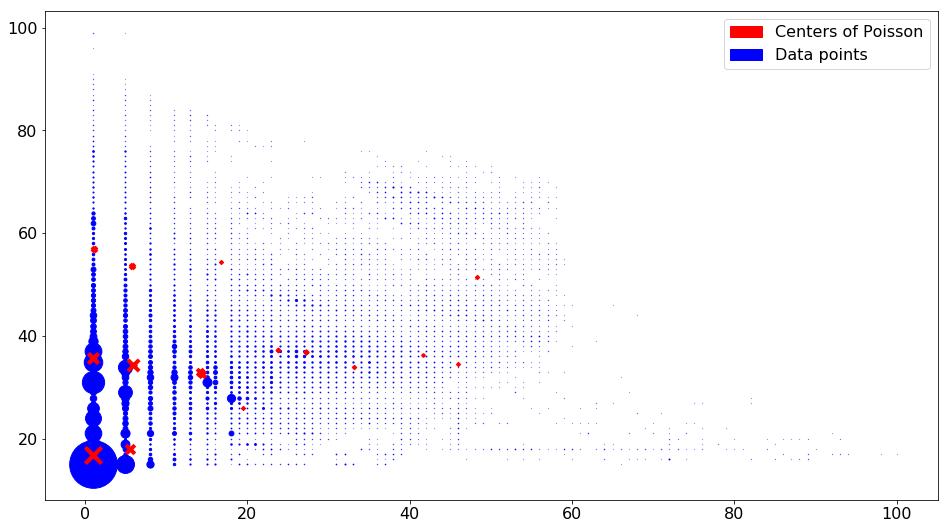

In [8]:
plot_results(onlineEM, legend=False)
plot_points(groupped_data.values[:,:-1], onlineEM)

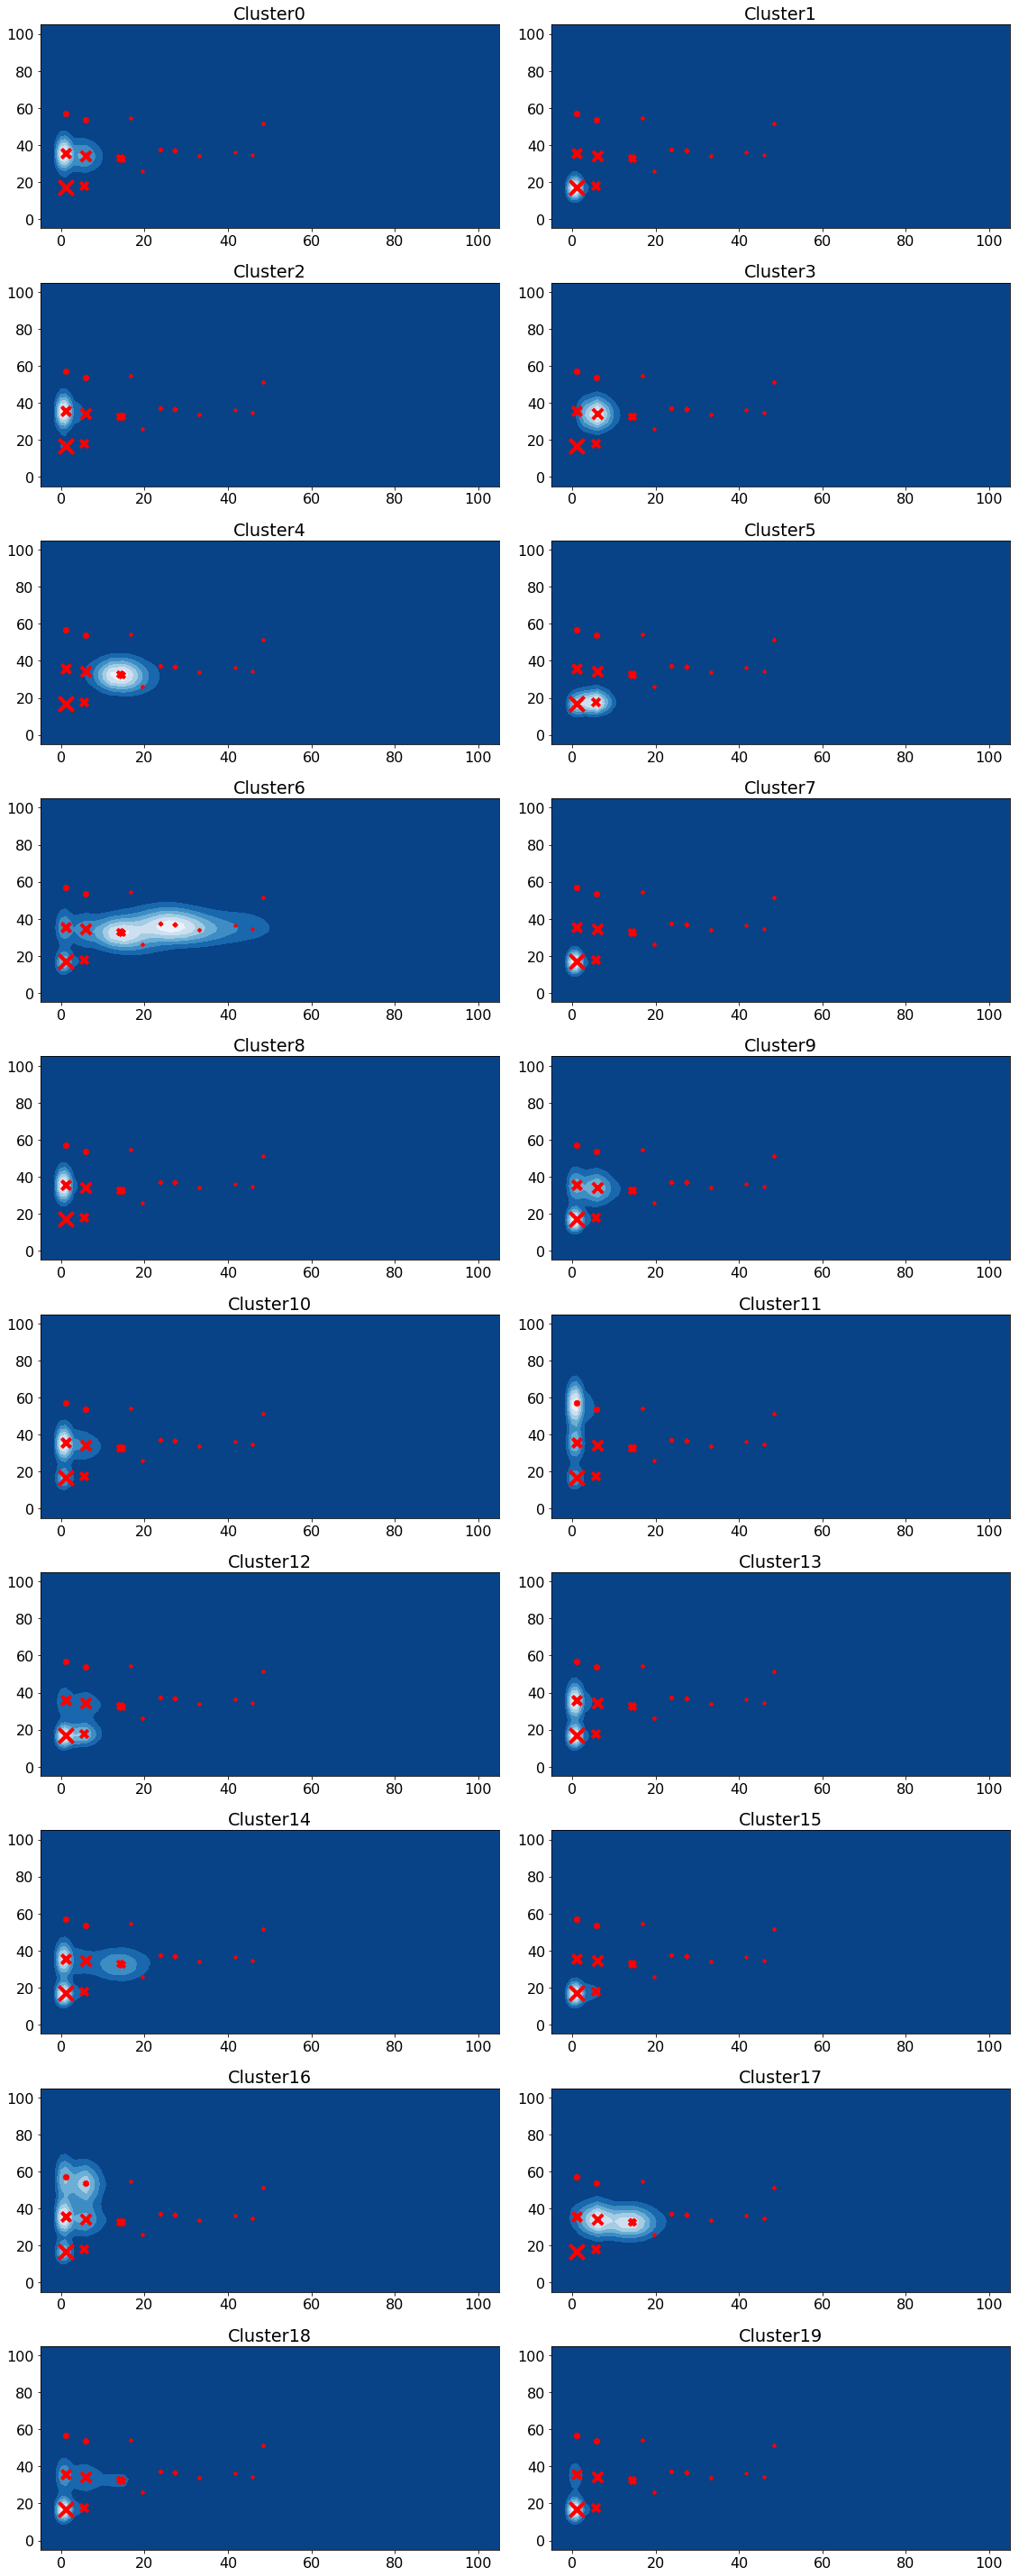

In [9]:
plot_all_categories(onlineEM)

#### Here are the anomalies from this data set and by host 

In [10]:
r = onlineEM.score_anomaly(groupped_data.values)

In [11]:
flags = r < onlineEM.threshold
print('A total of', np.sum(flags), 'anomalies')

# print(groupped_data.values[flags])
anomalies = groupped_data.values[flags]

import numpy_indexed as npi
anomalies_indexed = npi.group_by(anomalies[:, 2])

A total of 6226 anomalies


In [12]:
anomalies_per_host = np.column_stack((anomalies_indexed.unique, anomalies_indexed.count.T))
anomalies_per_host = anomalies_per_host[anomalies_per_host[:,1].argsort()][::-1]
print('A total of', len(anomalies_per_host), 'have been found to have anomalous behavior')

A total of 1529 have been found to have anomalous behavior


In [13]:
anomalies_per_host[:10]

array([['C1707', 294],
       ['C5721', 199],
       ['C16712', 170],
       ['C5720', 163],
       ['C1685', 163],
       ['C5030', 126],
       ['C16054', 126],
       ['C24954', 109],
       ['C8542', 82],
       ['C5736', 82]], dtype=object)

See for a particular host what is going on 

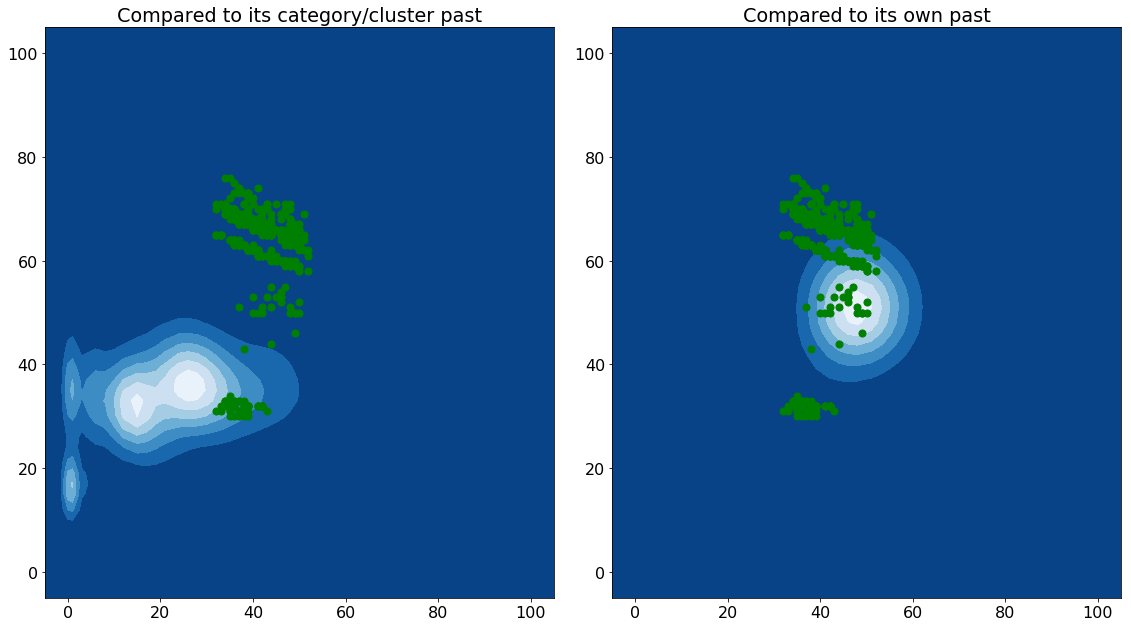

In [15]:
from plots import plot_for_host

data_for_host = plot_for_host('C1707', onlineEM, groupped_data.values)
# print(data_for_host)

In [16]:
data_for_host[:10]

[(array([34, 76, 'C1707'], dtype=object), 8.4799631285537044e-07),
 (array([35, 76, 'C1707'], dtype=object), 1.1707030452620669e-06),
 (array([36, 75, 'C1707'], dtype=object), 2.3230655146821532e-06),
 (array([32, 71, 'C1707'], dtype=object), 2.521544364800942e-06),
 (array([32, 70, 'C1707'], dtype=object), 3.4812040517171178e-06),
 (array([33, 71, 'C1707'], dtype=object), 3.6809522634011723e-06),
 (array([37, 74, 'C1707'], dtype=object), 4.4267049841644783e-06),
 (array([37, 74, 'C1707'], dtype=object), 4.4267049841644783e-06),
 (array([36, 73, 'C1707'], dtype=object), 4.8754599473886295e-06),
 (array([35, 72, 'C1707'], dtype=object), 5.1545749208404009e-06)]

In [29]:
test = []

for point in groupped_data.values:
    tt = onlineEM.score_anomaly_for_category(point[0:2])
    if (tt < 0.000001):
        test.append((point, tt))
print(len(test))        

74


In [30]:
test

[(array([23, 65, 'C625'], dtype=object), 6.5716283296916768e-07),
 (array([21, 68, 'C1295'], dtype=object), 1.3905576289224262e-07),
 (array([83, 23, 'C16712'], dtype=object), 3.5276339562503579e-08),
 (array([36, 71, 'C5721'], dtype=object), 4.3432778161682686e-07),
 (array([72, 23, 'C16712'], dtype=object), 6.5250958190744707e-07),
 (array([19, 69, 'C20101'], dtype=object), 6.8604139198330126e-07),
 (array([61, 59, 'C5721'], dtype=object), 9.5387263666479583e-08),
 (array([31, 68, 'C5721'], dtype=object), 6.6615111713464351e-07),
 (array([78, 23, 'C16712'], dtype=object), 1.6100813413036019e-07),
 (array([19, 65, 'C11573'], dtype=object), 5.1782834299029549e-07),
 (array([30, 69, 'C5721'], dtype=object), 4.3559175454479985e-07),
 (array([62, 56, 'C5721'], dtype=object), 1.2831260401863159e-07),
 (array([32, 67, 'C5721'], dtype=object), 9.726070389148908e-07),
 (array([36, 67, 'C5721'], dtype=object), 7.9985460034651463e-07),
 (array([35, 69, 'C5721'], dtype=object), 3.526983228072211

In [86]:
onlineEM.lambdas[6]

array([50.66885286720838, 83.9036709944296], dtype=object)

In [34]:
onlineEM.gammas

array([ 0.01256461,  0.03963829,  0.01888782,  0.0722305 ,  0.29969088,
        0.00421236,  0.00419753,  0.00553522,  0.13471942,  0.05226218,
        0.00509684,  0.07546205,  0.02186469,  0.06168858,  0.05155586,
        0.04328016,  0.00677478,  0.00701427,  0.02684014,  0.05648382])

In [17]:
from sklearn.externals import joblib  
joblib.dump(onlineEM, 'onlineEM_???.pkl')

['onlineEM_2000000_20.pkl']

### How to choose the correct number of categories

try the elbow method

see also gap statistic

In [11]:
from sklearn.cluster import KMeans

In [12]:
closest_centers = []

for host in onlineEM.hosts.keys():
    closest_centers.append(onlineEM.hosts[host]['group'])

In [13]:
cluster_sizes = range(3, 10)

cluster_scores = []

for k in cluster_sizes:
    km = KMeans(k, random_state=77)
    km.fit(closest_centers)
    cluster_scores.append(km.inertia_)

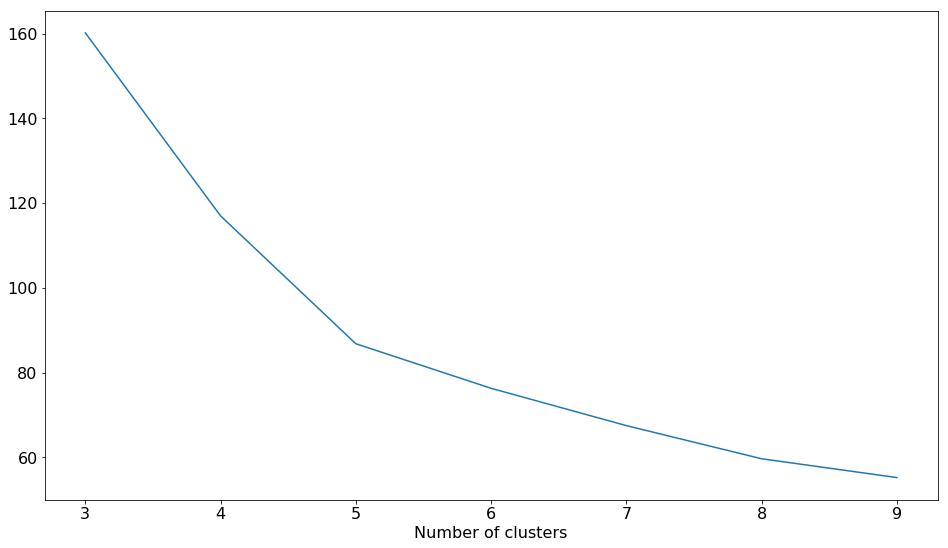

In [14]:
import matplotlib.pyplot as plt 

plt.plot(cluster_sizes, cluster_scores)
plt.xlabel('Number of clusters')
plt.show()

In [17]:
# try 7 clusters

n_clusters = 5

onlineEM.probabilities_per_kMean_cluster = np.zeros(shape=(n_clusters, onlineEM.m))
# each cluster has a number of hosts in it
onlineEM.counts_per_kMeans_cluster = np.zeros(n_clusters)
        
onlineEM.kMeans = KMeans(n_clusters, random_state=77)
onlineEM.kMeans.fit(closest_centers)

for host in onlineEM.hosts.keys():
    category = onlineEM.kMeans.predict([onlineEM.hosts[host]['group']])[0]
    onlineEM.hosts[host]['category'] = category
    points_in_cluster = onlineEM.counts_per_kMeans_cluster[category]

    onlineEM.probabilities_per_kMean_cluster[category] = \
        (onlineEM.probabilities_per_kMean_cluster[category] * points_in_cluster + onlineEM.hosts[host]['group']) / \
        (points_in_cluster + 1)

    onlineEM.counts_per_kMeans_cluster[category] += 1

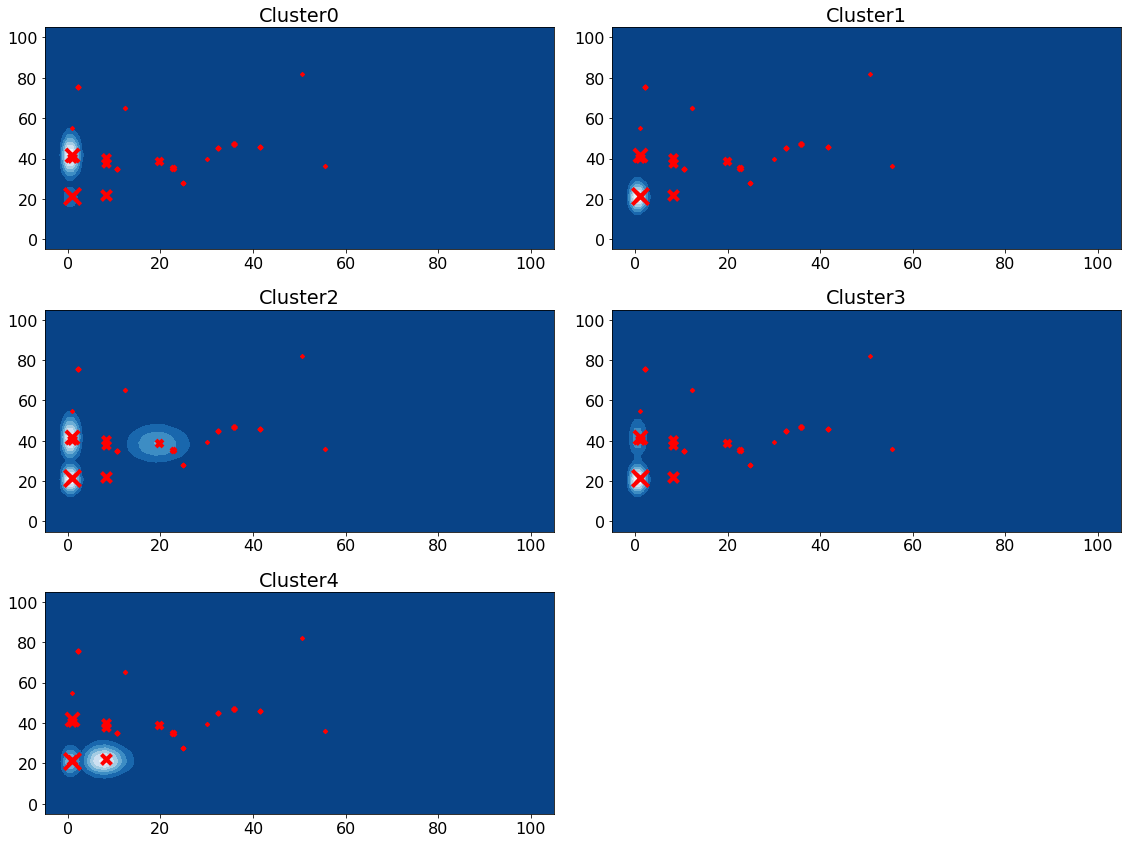

In [18]:
onlineEM.n_clusters = 5

plot_all_categories(onlineEM)

In [19]:
onlineEM.counts_per_kMeans_cluster

array([ 847.,  421.,  153.,  379.,   71.])

### How about a hierarchical approach

In [17]:
closest_centers = []

for host in onlineEM.hosts.keys():
    closest_centers.append(onlineEM.hosts[host]['group'])

<function print>

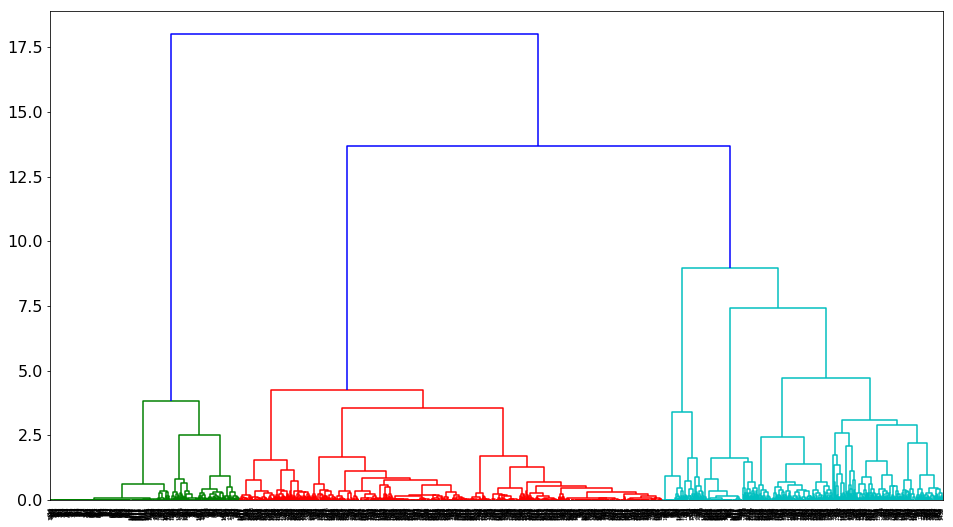

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(closest_centers, 'ward') # εκπαιδεύει τον αλγόριθμο
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

In [29]:
Z

array([[  1.26000000e+02,   2.22000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  5.26000000e+02,   1.87100000e+03,   0.00000000e+00,
          3.00000000e+00],
       [  9.35000000e+02,   1.45900000e+03,   0.00000000e+00,
          2.00000000e+00],
       ..., 
       [  3.73200000e+03,   3.73700000e+03,   8.95059118e+00,
          5.89000000e+02],
       [  3.73500000e+03,   3.73800000e+03,   1.36931272e+01,
          1.47200000e+03],
       [  3.73400000e+03,   3.73900000e+03,   1.80136651e+01,
          1.87100000e+03]])